# Australian Farming Exploratory Analysis
### Data Sources : ABS - yearly quantititive data for various farming industry trends, Stock Prices, GDP etc.



In [1]:
import os 


def getData():
    indexed_files = {}
    for file, dir in os.walk():
        with open(file) as o:
            data = o.read()
            indexed_files[file] = data
            o.close()
    
    return indexed_files
            

            
            

In [2]:
import pandas as pd

indexed_files = {}

for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        if ".xlsx" in file:
            print(root + "\\" + file )
            
            data = pd.read_excel(root + "\\" + file, sheet_name=1)
            
            print()
            # data = data[1:]
            
            # indexed_files[file] = data
            if("01_ACS2020" in root + "\\" + file):
                df = data.iloc[:, 1:-1]
   
   
    # with open(file) as o:
    #     data = o.read()
    #     indexed_files[file] = data
    #     o.close()


            

c:\repos\whygithubwhy\FarmingAnalysis\01_ACS2020_OverviewTables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_ACS2021_OverviewTables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_ACS2022_OverviewTables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202203_Tables_v1.2.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202206_Tables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202209_Tables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202212_Tables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202303_Tables_v1.0.0a.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202306_Tables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202309_Tables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202312_Tables_v1.1.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\01_AgCommodities202403_Tables_v1.0.0.xlsx

c:\repos\whygithubwhy\FarmingAnalysis\0

In [3]:
clean_df = df.dropna()

In [4]:

for col in clean_df.columns:
    
    if (col!= clean_df.columns[0]):
        clean_df[col] = clean_df[col].apply(lambda x: int(x))

C:\Users\joshc\AppData\Local\Temp\ipykernel_14316\1718179373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = clean_df[col].apply(lambda x: int(x))


In [5]:
clean_df.dtypes

Unnamed: 1    object
Unnamed: 2     int64
Unnamed: 3     int64
Unnamed: 4     int64
dtype: object

In [6]:
clean_df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
11,1974-75,15875,18131,497751
12,1975-76,17327,19629,510631
13,1976-77,17754,20153,529001
14,1977-78,17134,19494,533745
15,1978-79,21293,23725,555327
16,1979-80,18301,20809,572177
17,1980-81,15656,18243,591274
18,1981-82,18713,21227,610956
19,1982-83,14266,16586,597388
20,1983-84,21221,23768,624756


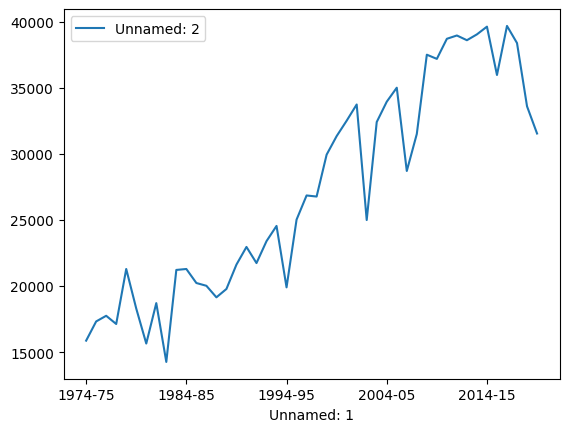

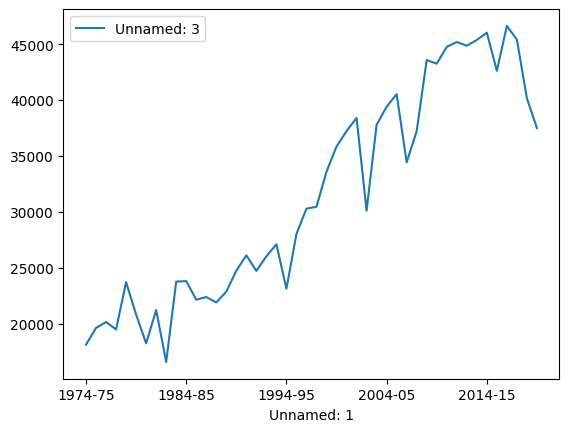

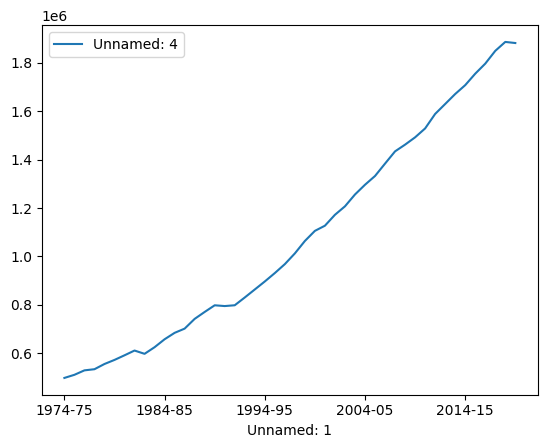

In [7]:
for col in clean_df.columns:
    if (col!= clean_df.columns[0]):
        clean_df.plot.line(x=clean_df.columns[0], y=col)

In [ ]:
# make a function that runs through all the datasets does a bunch of charts then does linear regression and something else maybe maybe not

In [10]:


def clean_dataframe(df: pd.DataFrame):
    """
    Drops Empty Columns, and sets headers to first row with data

    Args:
        df (dataframe): Read in generic Excel document

    Returns:
        dataframe: cleaned dataframe
    """
    
    drop_indexes = []
    
    for col in range(
        0, 
        len(df.columns)
        ):
        if df.iloc[:, col].count() == 0:

            drop_indexes.append(col)
    
    
    for drop_index in drop_indexes:
        df.drop(columns=df.columns[drop_index], axis=1, inplace=True)
    return df



for col in range(
    0, 
    len(indexed_files["01_ACS2020_OverviewTables_v1.0.0.xlsx"].columns)
    ):
    if indexed_files["01_ACS2020_OverviewTables_v1.0.0.xlsx"].iloc[:, col].count() == 0:

        drop_indexes.append(col)
        

           

print(drop_indexes)        

    
    

# indexed_files["01_ACS2020_OverviewTables_v1.0.0.xlsx"].iloc[:, col].count()

KeyError: '01_ACS2020_OverviewTables_v1.0.0.xlsx'

In [11]:
# check proportion of rows in a column as nan vs non nan if over 5% drop column
# 
# loops through the rows identifies first with non NaN space sets to header removes 

indexed_files["01_ACS2020_OverviewTables_v1.0.0.xlsx"].iloc[:, 1:]

KeyError: '01_ACS2020_OverviewTables_v1.0.0.xlsx'

In [12]:
clean_df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
11,1974-75,15875,18131,497751
12,1975-76,17327,19629,510631
13,1976-77,17754,20153,529001
14,1977-78,17134,19494,533745
15,1978-79,21293,23725,555327
16,1979-80,18301,20809,572177
17,1980-81,15656,18243,591274
18,1981-82,18713,21227,610956
19,1982-83,14266,16586,597388
20,1983-84,21221,23768,624756


In [13]:
# this is pretty meaningless just practicing using stuff!

from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np

y = np.array( list(clean_df[clean_df.columns[1]]))
# y = clean_df[clean_df.columns[0]]

x =  np.array(clean_df[clean_df.columns[1:3]])



reg = LinearRegression().fit(x, y, sample_weight=None)


# reg.score(x , y)

In [14]:
reg.score(x, y)

1.0

In [15]:
reg.coef_

array([1.00000000e+00, 3.41687016e-17])